In [1]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [4]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
import utils

C:/Windows/Fonts/STFANGSO.TTF not found.  If you wish to display Chinese characters in plots, please use set_font() to set the path to the font file.


In [176]:
# data=pd.read_csv('/Users/yuanfan/Documents/GitHub_mit/DXY-COVID-19-Data/csv/DXYArea.csv')
# news=pd.read_csv('/Users/yuanfan/Documents/GitHub_mit/DXY-COVID-19-Data/csv/DXYNews.csv')

## 1. Load Data from DXY

In [5]:
data = utils.load_chinese_data()
daily_frm = utils.aggDaily(data, clean_dates=True)

Last update:  2020-02-13 20:39:00.939000
Data date range:  2020-01-24 to 2020-02-13
Number of rows in raw data:  37275


In [6]:
daily_frm = utils.add_dailyNew(daily_frm)
daily_frm 

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured
36285,云南省,丽江市,1,0,0,2020-01-24 23:55:14.973,2020-01-24,NaN,NaN,NaN
36283,云南省,昆明,3,0,0,2020-01-24 23:55:14.973,2020-01-24,NaN,NaN,NaN
36284,云南省,西双版纳,1,0,0,2020-01-24 23:55:14.973,2020-01-24,NaN,NaN,NaN
36629,内蒙古自治区,满洲里,1,0,0,2020-01-24 13:04:21.168,2020-01-24,NaN,NaN,NaN
37157,北京市,不明地区,8,0,0,2020-01-24 07:37:33.464,2020-01-24,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
162,黑龙江省,绥化,45,3,4,2020-02-13 20:39:00.939,2020-02-13,2.0,0.0,0.0
161,黑龙江省,鸡西,44,1,0,2020-02-13 20:39:00.939,2020-02-13,1.0,0.0,0.0
170,黑龙江省,鹤岗,5,1,0,2020-02-13 20:39:00.939,2020-02-13,0.0,0.0,0.0
169,黑龙江省,黑河,10,0,0,2020-02-13 20:39:00.939,2020-02-13,4.0,0.0,0.0


In [7]:
daily_frm = utils.add_en_location(daily_frm)
daily_frm.fillna(0,inplace=True)

In [250]:
daily_frm_daily=daily_frm.sort_values('confirmed').groupby(['cityName','updateDate']).agg({'dailyNew_confirmed':'max','confirmed':'max',
                                                                   'dailyNew_cured':'max','dailyNew_dead':'max',
                                                                  'cured':'max','dead':'max'}).sort_values('confirmed')
daily_frm_daily

dailyNew_confirmed  confirmed  dailyNew_cured  \
cityName updateDate                                                  
待明确地区    2020-02-11                 0.0          0            38.0   
         2020-01-29                -1.0          0             1.0   
三明       2020-01-24                 0.0          0             0.0   
漳州       2020-01-24                 0.0          0             0.0   
未明确      2020-02-02                 0.0          0             0.0   
...                                 ...        ...             ...   
武汉       2020-02-09              1379.0      14982           131.0   
         2020-02-10              1920.0      16902           168.0   
         2020-02-11              1552.0      18454           196.0   
         2020-02-12              1104.0      19558           138.0   
         2020-02-13             13436.0      32994           543.0   

                     dailyNew_dead  cured  dead  
cityName updateDate                              
待明确地区    2020-02-11            3.0     40     3  
         2020-01-29            1.0      1     1  
三明       2020-01-24            0.0      0     0  
漳州       2020-01-24            0.0      0     0  
未明确      2020-02-02            0.0      2     0  
...                            ...    ...   ...  
武汉       2020-02-09           63.0    878   608  
         2020-02-10           73.0   1046   681  
         2020-02-11           67.0   1242   748  
         2020-02-12           72.0   1380   820  
         2020-02-13          216.0   1923  1036  

[7678 rows x 6 columns]

In [251]:
#flatten the dataframe
daily_frm_daily=pd.DataFrame(daily_frm_daily.to_records())
daily_frm_daily

,cityName,updateDate,dailyNew_confirmed,confirmed,dailyNew_cured,dailyNew_dead,cured,dead
0,待明确地区,2020-02-11,0.0,0,38.0,3.0,40,3
1,待明确地区,2020-01-29,-1.0,0,1.0,1.0,1,1
2,三明,2020-01-24,0.0,0,0.0,0.0,0,0
3,漳州,2020-01-24,0.0,0,0.0,0.0,0,0
4,未明确,2020-02-02,0.0,0,0.0,0.0,2,0
...,...,...,...,...,...,...,...,...
7673,武汉,2020-02-09,1379.0,14982,131.0,63.0,878,608
7674,武汉,2020-02-10,1920.0,16902,168.0,73.0,1046,681
7675,武汉,2020-02-11,1552.0,18454,196.0,67.0,1242,748
7676,武汉,2020-02-12,1104.0,19558,138.0,72.0,1380,820


fill in the missing date for each city

In [253]:

dailynewconfirm=daily_frm_daily.pivot(index='updateDate',columns='cityName',values='dailyNew_confirmed').fillna(0)


dailynewconfirm_st = pd.DataFrame(dailynewconfirm.stack(), columns=['dailyNew_confirmed']).reset_index()
dailynewconfirm_st

,updateDate,cityName,dailyNew_confirmed
0,2020-01-24,七台河,0.0
1,2020-01-24,万宁,0.0
2,2020-01-24,万州区,0.0
3,2020-01-24,万盛经开区,0.0
4,2020-01-24,三亚,0.0
...,...,...,...
10369,2020-02-13,黔南州,0.0
10370,2020-02-13,黔江区,0.0
10371,2020-02-13,黔西南州,0.0
10372,2020-02-13,齐齐哈尔,0.0


### 1.2 This simply visualize the heatmap with New York Time Palette

*Please notice that the visualizition is at <b>Log scale</b>. 

In [254]:
dailynewconfirm_st=dailynewconfirm_st.sort_values(['dailyNew_confirmed','updateDate'])
dailynewconfirm_st['date']=dailynewconfirm_st.updateDate.astype(str)
#dailynewconfirm_st=dailynewconfirm_st[['cityName', 'dailyNew_confirmed', 'date']]
dailynewconfirm_st['ln(dailynew)']=np.log(dailynewconfirm_st['dailyNew_confirmed']+1)

In [255]:
from math import pi
import pandas as pd

from bokeh.io import show
from bokeh.models import LinearColorMapper, BasicTicker, PrintfTickFormatter, ColorBar
from bokeh.plotting import figure


date=list(dailynewconfirm.index.astype(str))
city=list(dailynewconfirm_st.cityName.unique())
# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=0, 
                           high=dailynewconfirm_st['ln(dailynew)'].max())

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title="City Daily New Confirmed ({0} - {1})".format(date[0], date[-1]),
           x_range=date, y_range=city,
           x_axis_location="above", plot_width=900, plot_height=3600,
           tools=TOOLS, toolbar_location='below',
           tooltips=[('Date', '@date'), ('Daily New Confirmed', '@dailyNew_confirmed'),('City','@cityName')]
          )

#tooltips=[('Date', '@date'), ('Daily New Confirmed', '@dailyNew_confirmed%'),('City','@cityName')]

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="date", y="cityName", width=1, height=1,
       source=dailynewconfirm_st,
       fill_color={'field': 'ln(dailynew)', 'transform': mapper},
       line_color=None)


show(p)

## 2. Simulate the susceptible-exposed-infectious- recovered (SEIR) model with fake data

*Reference: Wu, J. T., Leung, K., &
Leung, G. M. (2020). Nowcasting and forecasting the potential domestic and
international spread of the 2019-nCoV outbreak originating in Wuhan, China: a
modelling study. The Lancet.

<b>Key player:</b>
1. Susceptibles at day t: S(t) in the paper, the susceptibles is estimated by the number of inbound/outbound travellers from Wuhan
2. Exposed people at day t:E(t)
3. Infectious at day t: I(t)
4. Recoverd at day t: R(t)

<b>Other Variables: </b>
1. N: total population in a given place
2. beta: Infectious rate
3. R0: the basic reproductive number, R0=r*beta in the model below, you could replace them with the known number for each city in the paper
4. r: number of people have contacted the susceptics (scraping weibo? get a proxy)
5. r2: number of people have contacted with the exposed(scraping weibo? get a proxy)
6. a: the probability a susceptible turn to a exposed
7. y: the probability of recover



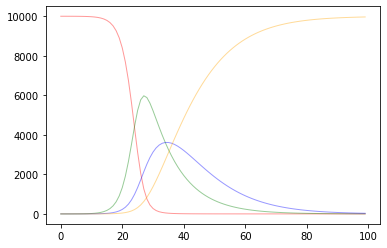

In [257]:
import matplotlib.pyplot as plt
N = 10000      #total population for each city (district)
E = [0]       #潜伏者 Exposed people at day 1 (this is the data estimated by people coming into City from Wuhan at Day 1)
I = [1]       #传染者 Infectious people at day 1 (this is estimated with confirmed data from Hospitals)
S = [N - I[0]]#易感者 Susceptibles at day 1 (the rest of the city)
R = [0]      #康复者 Recovered at day 1 (reported from the city)

r = 20      #感染者接触易感者的人数 This we will need trajectory(location) data
beta = 0.01 #传染概率 
a = 0.1     #潜伏者转化为感染者概率 
r2 = 20     #潜伏者接触易感者的人数 This we will need trajectory (location) data
beta2 = 0.03 #潜伏者传染正常人的概率 Get this from paper(historical data simulated) 
y = 0.1      #康复概率 (from hospital data)

T = 100

for i in range(T-1):
    susceptic=S[i]-r*beta*S[i]*I[i]/N-r2*beta2*S[i]*E[i]/N
    exposed=E[i]+r*beta*S[i]*I[i]/N-a*E[i]+r2*beta2*S[i]*E[i]/N
    infectious=I[i]+a*E[i]-y*I[i]
    recover=R[i]+y*I[i]
    S.append(susceptic)
    E.append(exposed)
    I.append(infectious)
    R.append(recover)

    
df=pd.DataFrame({'susceptics':S,'Exposed':E,'Infectous':I,'Recover':r})


plt.plot(range(T),S,marker='', color='red', linewidth=1, alpha=0.4)

plt.plot(range(T),E,marker='', color='green', linewidth=1, alpha=0.4)
plt.plot(range(T),I,marker='', color='blue', linewidth=1, alpha=0.4)
plt.plot(range(T),R,marker='', color='orange', linewidth=1, alpha=0.4)

## 2.2 Exploring the Real Data, get the beta (infectious rate)

#### This experiment use the article from Beijing University, which criticize the previous one only depending on constant beta.

<b>beta=daily_new_exposed(t)/(current_infectious+ 0.1* current_exposed)</b>

##### This experiment is done at city level. But given the data sparcity, we should use the province data to get beta value

In [258]:
dailynewconfirm.head()

cityName,七台河,万宁,万州区,万盛经开区,三亚,三明,三门峡,上饶,不明地区,东丽区,...,黄山,黄浦区,黄石,黑河,黔东南州,黔南州,黔江区,黔西南州,齐齐哈尔,龙岩
updateDate,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,3.0,7.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,3.0,0.0,2.0,3.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,2.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-28,1.0,0.0,1.0,0.0,3.0,4.0,0.0,1.0,0.0,0.0,...,3.0,1.0,17.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0


#### Current Infectious (t) = sum (daily confirmed cases(t)+...+daily confirmed cases(t+3))
#### Current Exposed (t) = sum (daily confirmed cases(t)+...+daily confirmed cases(t+9))

In [259]:
delta_exposed=dailynewconfirm.shift(periods=-9)
delta_infectious=dailynewconfirm.shift(periods=-3)
daily_exposed.head()

exposed=dailynewconfirm.rolling(9).sum().shift(-8)
infectious=dailynewconfirm.rolling(3).sum().shift(-2)
infectious

cityName,七台河,万宁,万州区,万盛经开区,三亚,三明,三门峡,上饶,不明地区,东丽区,...,黄山,黄浦区,黄石,黑河,黔东南州,黔南州,黔江区,黔西南州,齐齐哈尔,龙岩
updateDate,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0,3.0,10.0,0.0,6.0,4.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,5.0,11.0,0.0,9.0,4.0,2.0,4.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-26,1.0,2.0,5.0,0.0,8.0,7.0,2.0,5.0,0.0,0.0,...,3.0,1.0,22.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
2020-01-27,1.0,3.0,4.0,0.0,6.0,4.0,2.0,3.0,0.0,0.0,...,6.0,2.0,55.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0
2020-01-28,1.0,1.0,10.0,0.0,3.0,6.0,2.0,5.0,0.0,0.0,...,6.0,3.0,77.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2020-01-29,1.0,1.0,14.0,0.0,0.0,2.0,3.0,5.0,0.0,0.0,...,5.0,2.0,115.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2020-01-30,3.0,0.0,22.0,0.0,1.0,2.0,3.0,7.0,0.0,0.0,...,2.0,2.0,123.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2020-01-31,4.0,0.0,20.0,0.0,3.0,1.0,2.0,8.0,0.0,0.0,...,2.0,1.0,139.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0
2020-02-01,4.0,1.0,21.0,0.0,4.0,1.0,1.0,20.0,0.0,0.0,...,0.0,1.0,166.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0


In [260]:
#put into one dataframe
infectious_df=pd.DataFrame(infectious.stack(), columns=['infected']).reset_index()
exposed_df=pd.DataFrame(exposed.stack(), columns=['exposed']).reset_index()
delta_exposed_df=pd.DataFrame(delta_exposed.stack(), columns=['new_exposed']).reset_index()
delta_exposed_df.head()

,updateDate,cityName,new_exposed
0,2020-01-24,七台河,1.0
1,2020-01-24,万宁,0.0
2,2020-01-24,万州区,5.0
3,2020-01-24,万盛经开区,0.0
4,2020-01-24,三亚,2.0


In [261]:
#remove noise

df=daily_frm_daily.merge(delta_exposed_df,on=['updateDate','cityName'], how='left')
dff=df.merge(exposed_df, on=['updateDate','cityName'], how='left')
seis_df=dff.merge(infectious_df, on=['updateDate','cityName'], how='left')
seis_df['infected']=seis_df['infected'].apply(lambda x: 0 if x<0 else x)
seis_df['exposed']=seis_df['exposed'].apply(lambda x: 0 if x<0 else x)
seis_df['new_exposed']=seis_df['new_exposed'].apply(lambda x: 0 if x<0 else x)
seis_df['beta']=seis_df['new_exposed']/(seis_df['infected']+0.1*seis_df['exposed'])


seis_df

,cityName,updateDate,dailyNew_confirmed,confirmed,dailyNew_cured,dailyNew_dead,cured,dead,new_exposed,exposed,infected,beta
0,待明确地区,2020-02-11,0.0,0,38.0,3.0,40,3,NaN,NaN,7.0,NaN
1,待明确地区,2020-01-29,-1.0,0,1.0,1.0,1,1,6.0,9.0,0.0,6.666667
2,三明,2020-01-24,0.0,0,0.0,0.0,0,0,1.0,10.0,4.0,0.200000
3,漳州,2020-01-24,0.0,0,0.0,0.0,0,0,1.0,11.0,4.0,0.196078
4,未明确,2020-02-02,0.0,0,0.0,0.0,2,0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7673,武汉,2020-02-09,1379.0,14982,131.0,63.0,878,608,NaN,NaN,4851.0,NaN
7674,武汉,2020-02-10,1920.0,16902,168.0,73.0,1046,681,NaN,NaN,4576.0,NaN
7675,武汉,2020-02-11,1552.0,18454,196.0,67.0,1242,748,NaN,NaN,16092.0,NaN
7676,武汉,2020-02-12,1104.0,19558,138.0,72.0,1380,820,NaN,NaN,NaN,NaN


In [262]:
daily_frm.columns

Index(['provinceName', 'cityName', 'confirmed', 'cured', 'dead', 'updateTime',
       'updateDate', 'dailyNew_confirmed', 'dailyNew_dead', 'dailyNew_cured',
       'provinceName_en', 'cityName_en'],
      dtype='object')

In [267]:
df_province['provinceName_en'].unique()

array(['Yunnan', 'Neimenggu', 'Beijing', 'Liaoning', 'Jilin', 'Sichuan',
       'Ningxia', 'Anhui', 'Shandong', 'Shanxi', 'Guangdong', 'Guangxi',
       'Jiangsu', 'Jiangxi', 'Hebei', 'Henan', 'Zhejiang', 'Hubei',
       'Hunan', 'Gansu', 'Fujian', 'Guizou', 'Chongqing', 'Helongjiang',
       'Xinjiang', 'Shanghai', 'Tibet', 'Qinghai', 'Tianjin', 'Aomen'],
      dtype=object)

In [268]:
df_province=daily_frm[['provinceName_en','cityName_en','cityName']].merge(seis_df,on='cityName', how='right')
df_province

,provinceName_en,cityName_en,cityName,updateDate,dailyNew_confirmed,confirmed,dailyNew_cured,dailyNew_dead,cured,dead,new_exposed,exposed,infected,beta
0,Yunnan,Lijiang,丽江市,2020-01-24,0.0,1,0.0,0.0,0,0,0.0,1.0,1.0,0.00000
1,Yunnan,Lijiang,丽江市,2020-01-24,0.0,1,0.0,0.0,0,0,0.0,1.0,1.0,0.00000
2,Yunnan,Lijiang,丽江市,2020-01-25,1.0,2,0.0,0.0,0,0,0.0,1.0,1.0,0.00000
3,Yunnan,Lijiang,丽江市,2020-01-25,1.0,2,0.0,0.0,0,0,0.0,1.0,1.0,0.00000
4,Yunnan,Kunming,昆明,2020-01-24,0.0,3,0.0,0.0,0,0,1.0,27.0,1.0,0.27027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141245,Yunnan,红河州,红河州,2020-02-13,0.0,7,0.0,0.0,3,0,NaN,NaN,NaN,NaN
141246,Yunnan,红河州,红河州,2020-02-13,0.0,7,0.0,0.0,3,0,NaN,NaN,NaN,NaN
141247,Yunnan,红河州,红河州,2020-02-12,1.0,7,1.0,0.0,3,0,NaN,NaN,NaN,NaN
141248,Yunnan,红河州,红河州,2020-02-12,1.0,7,1.0,0.0,3,0,NaN,NaN,NaN,NaN


In [272]:
beijing=df_province[df_province['provinceName_en']=='Beijing']

In [273]:
beijing.head()

,provinceName_en,cityName_en,cityName,updateDate,dailyNew_confirmed,confirmed,dailyNew_cured,dailyNew_dead,cured,dead,new_exposed,exposed,infected,beta
902,Beijing,Unknown,不明地区,2020-01-24,0.0,8,0.0,0.0,0,0,0.0,0.0,0.0,NaN
903,Beijing,Fengtaiqu,丰台区,2020-01-24,0.0,2,0.0,0.0,0,0,0.0,14.0,2.0,0.0
904,Beijing,Fengtaiqu,丰台区,2020-01-24,0.0,2,0.0,0.0,0,0,0.0,14.0,2.0,0.0
905,Beijing,Fengtaiqu,丰台区,2020-01-24,0.0,2,0.0,0.0,0,0,0.0,14.0,2.0,0.0
906,Beijing,Fengtaiqu,丰台区,2020-01-24,0.0,2,0.0,0.0,0,0,0.0,14.0,2.0,0.0


In [282]:
#this graph is really noisy, we should aggregate the data to province to get the beta
import plotly.express as px


fig = px.line(beijing.sort_values(['cityName','updateDate']), x="updateDate", y="beta", color='cityName')
fig.show()

## 4. Use real data